In [5]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
from keras import initializers
keras.utils.set_random_seed(5)
tf.config.experimental.enable_op_determinism()

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
Y = data.iloc[:,-1].values
X = data.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
X = data.iloc[:,3:13]
X['Gender']=X['Gender'].map({'Female':0,'Male':1})
### above is used instead of a more complicated package involving -- from sklearn.preprocessing import LabelEncoder
### converts Female -- 0, Male -- 1, i.e. hot-encoding categorical variables
print (X['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


In [7]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))
### Geography is transformed into France -- 1,0,0; Spain -- 0,0,1; Germany -- 0,1,0.
### Moreover -- this encoded vector of ones-zeros is now put in first 3 cols. Credit Score pushed to 4th col.

In [8]:
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
NNmodel = tf.keras.models.Sequential()

In [12]:
#3 hidden layer each with 6 neurons
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
NNmodel.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [13]:
NNmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [14]:
history=NNmodel.fit(X_train,Y_train,batch_size=100,epochs = 500)

Epoch 1/500
80/80 [==============================] - 1s 2ms/step - loss: 0.5893 - accuracy: 0.7972
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7972
Epoch 3/500
80/80 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7972
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7972
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7972
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7972
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7972
Epoch 8/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7972
Epoch 9/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7972
Epoch 10/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7972
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8585
Epoch 84/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8614
Epoch 85/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8605
Epoch 86/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8608
Epoch 87/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8616
Epoch 88/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8614
Epoch 89/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8618
Epoch 90/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8615
Epoch 91/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8620
Epoch 92/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8612
Epoch 93/500


80/80 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8635
Epoch 165/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8618
Epoch 166/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8626
Epoch 167/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8624
Epoch 168/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8626
Epoch 169/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8627
Epoch 170/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8635
Epoch 171/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8633
Epoch 172/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8630
Epoch 173/500
80/80 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8625
Epoc

80/80 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8626
Epoch 246/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8626
Epoch 247/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8627
Epoch 248/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8625
Epoch 249/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8614
Epoch 250/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8619
Epoch 251/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8629
Epoch 252/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8606
Epoch 253/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8616
Epoch 254/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8622
Epoc

80/80 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8643
Epoch 327/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8644
Epoch 328/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8631
Epoch 329/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8639
Epoch 330/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8633
Epoch 331/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8630
Epoch 332/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8627
Epoch 333/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8658
Epoch 334/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8634
Epoch 335/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8631
Epoc

80/80 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8646
Epoch 408/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8640
Epoch 409/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8643
Epoch 410/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8631
Epoch 411/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8630
Epoch 412/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8641
Epoch 413/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8646
Epoch 414/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8633
Epoch 415/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8639
Epoch 416/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8640
Epoc

80/80 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8641
Epoch 489/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8641
Epoch 490/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8625
Epoch 491/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8634
Epoch 492/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8643
Epoch 493/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8639
Epoch 494/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8655
Epoch 495/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8645
Epoch 496/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8631
Epoch 497/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8643
Epoc

In [15]:
NNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (100, 6)                  78        
                                                                 
 dense_1 (Dense)             (100, 6)                  42        
                                                                 
 dense_2 (Dense)             (100, 6)                  42        
                                                                 
 dense_3 (Dense)             (100, 1)                  7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
NNmodel.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8675


[0.32790276408195496, 0.8675000071525574]

[0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.7973750233650208, 0.8015000224113464, 0.8087499737739563, 0.8153749704360962, 0.8201249837875366, 0.8211249709129333, 0.8206250071525574, 0.8228750228881836, 0.8240000009536743, 0.8247500061988831, 0.8271250128746033, 0.8270000219345093, 0.8287500143051147, 0.828499972820282, 0.8295000195503235, 0.8286250233650208, 0.8291249871253967, 0.8307499885559082, 0.8299999833106995, 0.8323749899864197, 0.8335000276565552, 0.8345000147819519, 0.8368750214576721, 0.8371250033378601, 0.8395000100135803, 0.8412500023841858, 0.841

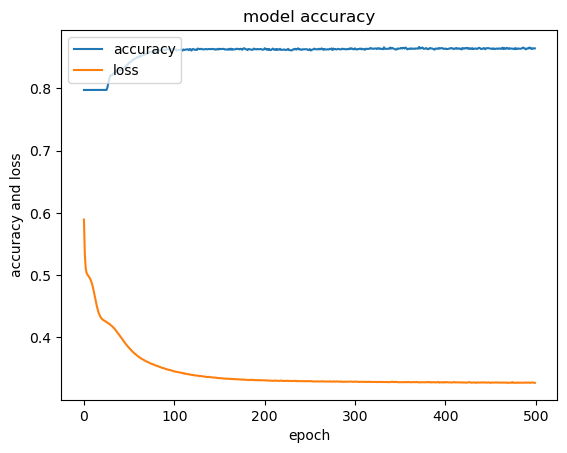

In [19]:
import matplotlib.pyplot as plt
print(history.history['accuracy'])
print(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [22]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
tr=sc.transform([[0, 0, 1, 650, 1, 60, 2, 300000, 2, 1, 0, 80000]])

In [25]:
print(NNmodel.predict(tr))

1/1 [==============================] - 0s 105ms/step
[[0.7294824]]
